Projekt ten polegał na złożeniu i analizie użyteczności korpusu języka polskiego, bazującego na napisach do filmów z portalu <a href="https://www.opensubtitles.org/pl">OpenSubtitles</a>. Złożony został on z pomocą artykułu znajdującego się na stronie <a href="http://www.deepdata.pl/uncategorized/przygotowanie-polskiego-modelu-word2vec-z-wykorzystaniem-korpusu-opensubtitles/">DeepData</a>.

Niestety nie mogę umieścić na githubie samego korpusu ani wektorów wyrazów, jako że ważą odpowiednio 35.8 GB i 2.54 GB. Sam proces składania korpusu był zaskakująco łatwy, jedyne napotkane problemy wynikały z różnicy systemów operacyjnych (linux vs windows), co dało się łatwo rozwiązać. 

Proces ten jest dokładnie opisany w artykule opisanym na DeepData, wspomnianym powyżej.

In [1]:
import gensim

# Load pre-trained Word2Vec model.

model = gensim.models.KeyedVectors.load('data/w2v-779790010-1000000-300-5-5-OpenSubtitles2016.bin')

Zacznę analizę od podstawowego sprawdzenia działania algorytmu word2vec - arytmetyki wyrazów:

In [2]:
model.wv.most_similar_cosmul(positive=['chłopiec', 'król'], negative=['mężczyzna'])

[('książę', 0.8767783045768738),
 ('henryk', 0.8651032447814941),
 ('ryszard', 0.8637024760246277),
 ('królem', 0.863436758518219),
 ('książe', 0.8391220569610596),
 ('wnuk', 0.8362434506416321),
 ('chłopczyk', 0.8343275785446167),
 ('króla', 0.8215566873550415),
 ('knut', 0.8209719657897949),
 ('alencon', 0.8143123388290405)]

Na podanym przykładzie model poradził sobie całkiem dobrze; odjął on w przestrzeni 3D pozycję słowa "mężczyzna" i dodał do siebie pozycję chłopca oraz króla - w wyniku czego jako wynik dostaliśmy księcia. Pozostałe wyniki to głównie imiona książąt.

Spróbujmy więc na innym przykładzie - po odjęciu słowa mężczyzna od kobiety i singla, oczekuję słowa singielka:

In [3]:
model.wv.most_similar_cosmul(positive=['kobieta', 'singiel'], negative=['mężczyzna'])

[('piosenka', 0.8018705248832703),
 ('playlista', 0.7987034320831299),
 ('plyta', 0.797555685043335),
 ('instrumentalna', 0.7940607666969299),
 ('współprowadząca', 0.7920069694519043),
 ('emigrantka', 0.7901372909545898),
 ('kompozytorka', 0.7883856296539307),
 ('beesly', 0.7874900102615356),
 ('plyte', 0.7862184643745422),
 ('zainspirowałyście', 0.7849257588386536)]

...jednak nasz model zrozumiał słowo singiel, jako utwór muzyczny, w wyniku czego dostajemy wyniki związane z muzyką. Spróbujmy teraz zamienić słowo "singiel" na "singielka":

In [4]:
model.wv.most_similar(positive=['kobieta', 'singielka'], negative=['mężczyzna'])

[('dziewczyna', 0.602064847946167),
 ('kurierka', 0.5598759651184082),
 ('aktywistka', 0.553925633430481),
 ('pomponiara', 0.5487672090530396),
 ('tradycjonalistka', 0.5482555627822876),
 ('geniuszka', 0.5479387044906616),
 ('siostra-', 0.5476123690605164),
 ('osoba', 0.5453750491142273),
 ('mleczarka', 0.5445608496665955),
 ('marynara', 0.5440495610237122)]

Model nie wydaje się już być tak skuteczny, jak wcześniej. Nie mógł znaleźć on odpowiedniego słowa oddającego znaczenie. 

Wybierając odpowiednie podane przykłady natrafiłem na dużą ilość przekleństw i obraźliwych sformułowań. Związane jest to z pochodzeniem korpusu - jako iż korpus ten to zbiór tekstów z filmów, nie jest on na tyle dobry, by móc go zastosować aplikacjach w życiu codziennym. Potrafi być jednak wyjątkowym źródłem humoru:

In [5]:
model.wv.most_similar(positive=['mężczyzna'], negative=['auto'])

[('afroamerykanin', 0.40922433137893677),
 ('osobnik', 0.4016307294368744),
 ('człowiek', 0.3870110809803009),
 ('samiec', 0.3869101405143738),
 ('żyd', 0.37631773948669434),
 ('ciemnowłosy', 0.3713551461696625),
 ('facet', 0.3698599338531494),
 ('męźczyzna', 0.36067646741867065),
 ('dżentelmen', 0.3591129779815674),
 ('afro-amerykanin', 0.35804295539855957)]

Za pomocą tak zbudowanego modelu modelu można także sprawdzić podobieństwo wyrazów:

In [6]:
model.wv.similarity("auto", "wóz")

0.5900921

In [7]:
model.wv.similarity('auto','mężczyzna')

0.13270263

Co nie powinno nas dziwić, auto jest bardziej podobne do wozu (59%) niż do mężczyzny (13,27%).

Porównania podobieństw jednak także mają swoje smaczki:

In [8]:
model.wv.similarity("słoń", "mysz")

0.2685595

In [9]:
model.wv.similarity("kobieta", "mysz")

0.29158443

...gdyż według tego porównania, kobieta (29,16%) jest bardziej podobna do myszy niż słoń (26,86%). Związane jest to prawdopodobnie z daleką odległością od siebie tych słów, gdyż słowa te mają odległe znaczenia dla modelu i są prawie niezwiązane ze sobą.

Słowa najbardziej podobne do słonia momentalnie też wprowadzają w wątpliwość działanie modelu:

In [10]:
model.wv.most_similar('słoń')

[('ptak', 0.5204013586044312),
 ('dinozaur', 0.5034255385398865),
 ('niedźwiedź', 0.4912494421005249),
 ('allozaur', 0.4901781678199768),
 ('słonik', 0.4850887656211853),
 ('koushi-dono', 0.48391562700271606),
 ('gołemu', 0.47393032908439636),
 ('chrupał', 0.4714850187301636),
 ('bazgrzący', 0.47128206491470337),
 ('stegosaurus', 0.47006070613861084)]

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

top_n=50

top_words=model.wv.index2word[1000:1000+top_n]
top_words=np.append(np.array(top_words),np.array([np.array(model.wv.most_similar_cosmul(w, topn=8))[:,0] for w in top_words]))
top_words=top_words.flatten()
top_words=set(top_words)

In [12]:
word_weights=[model.wv.word_vec(w, use_norm=False) for w in top_words]
word_indexes=list(top_words)

In [13]:
viz_words = len(word_weights)
tsne = TSNE()
#embed_tsne = tsne.fit_transform(model.wv.syn0[:viz_words, :])
embed_tsne = tsne.fit_transform(word_weights)

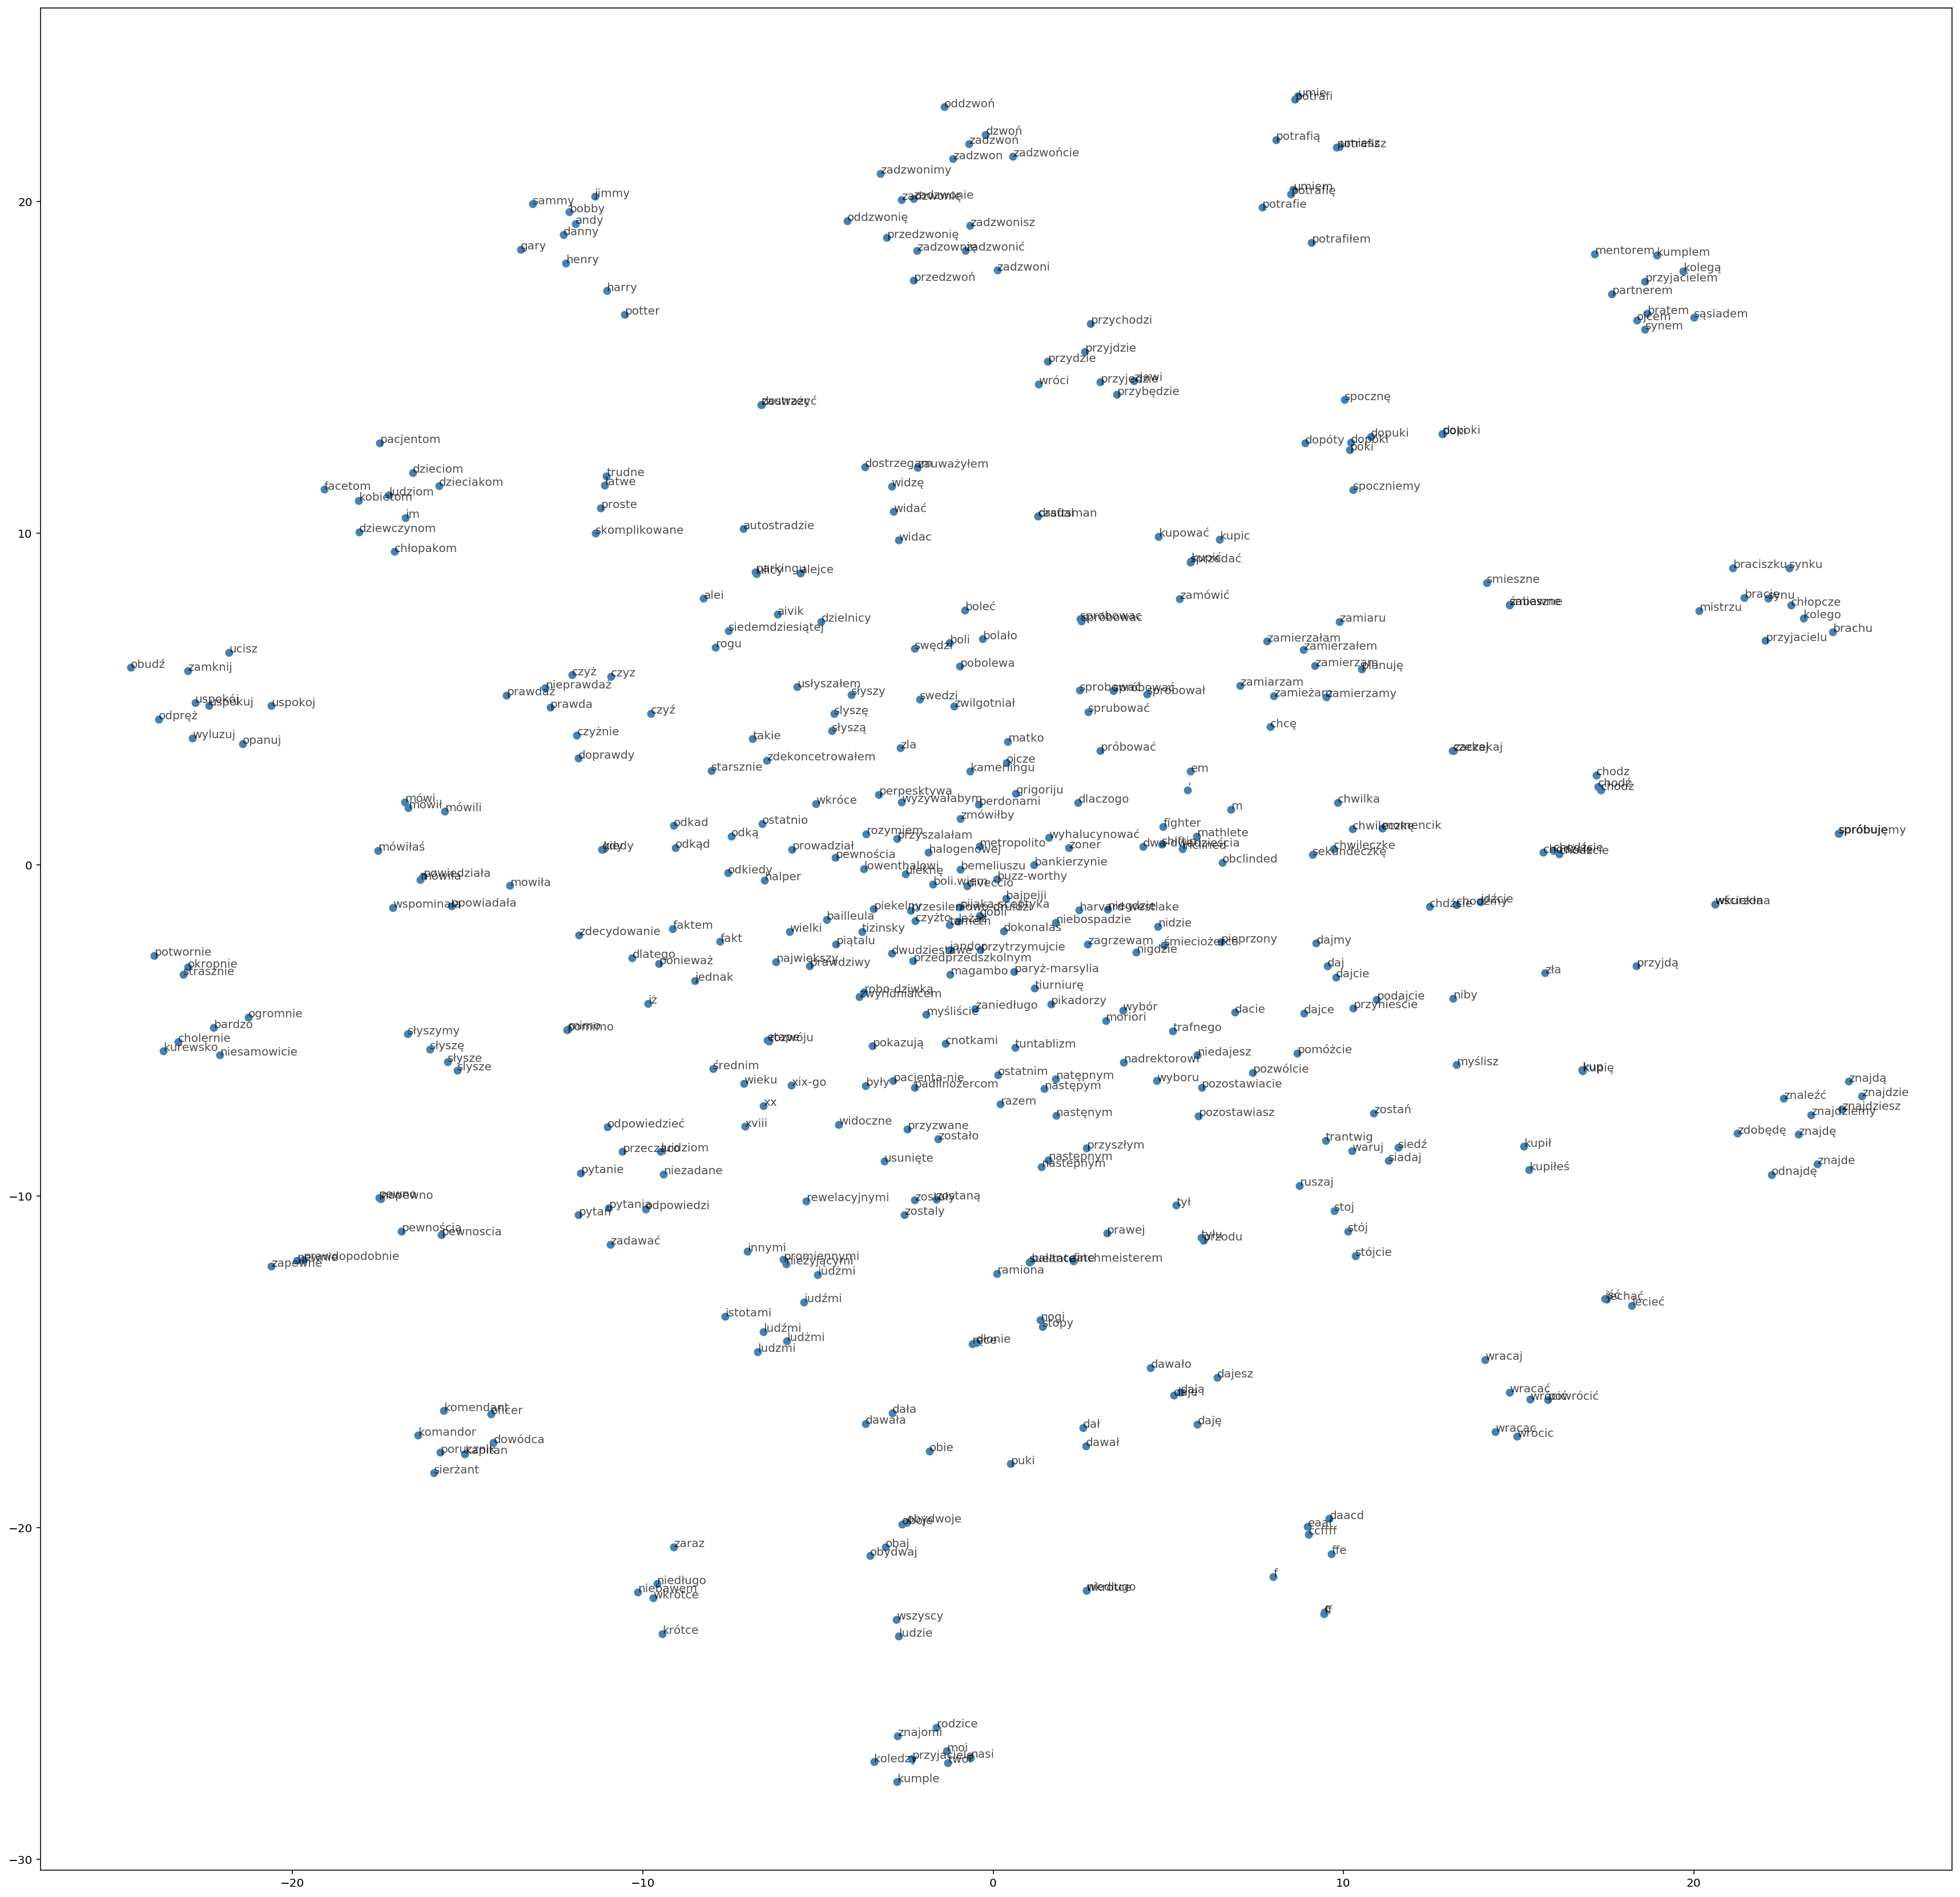

In [14]:
fig, ax = plt.subplots(figsize=(30, 30))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word_indexes[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

Wykres powyżej pokazuje położenie słów względem siebie ułożone przez zastosowany model. Najlepiej widać relacje po otworzeniu zdjęcia w nowej karcie. Na wykresie nie ma oczywiście wszystkich zdjęć, jest to mała reprezentacja wszystkiego.

Podsumowując, model word2vec wydaje się być wysoce obiecującym w dziedzinie Natural Language Processing. Problemem jaki może napotkać jest mnogość odmian słów oraz przypadków w języku polskim. Na jego wydajność wpływa także jakość korpusu, który został użyty do nauczenia modelu.

Korpus złożony na podstawie OpenSubtitles nie wydaje się być jednak użyteczny. Zawiera on dużo słów zawierających błędy gramatyczne, przekleństw, oraz obraźliwych sformuowań - i o ile te dwa ostatnie wspomniane cechy mogą komuś nie przeszkadzać, tak błędy gramatyczne wpływają mocno na rozpoznawanie wyrazów i rozmieszczenie ich w przestrzeni, zabierając także miejsce innym wyrazom, które mogły by się znaleźć przy podanym limicie.